In [1]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout


import tensorflow

cnn = tensorflow.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tensorflow.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Adding a second convolutional layer
cnn.add(tensorflow.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Third Convolutional Layer
# cnn.add(tensorflow.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
# cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Step 3 - Flattening
cnn.add(tensorflow.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tensorflow.keras.layers.Dense(units=128, activation='relu'))

cnn.add(Dropout(0.5))

# Step 5 - Output Layer
cnn.add(tensorflow.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

2021-11-12 14:14:48.999192: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
cnn.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [4]:
dataset = 'dataset'
training_set = 'dataset/dogs_vs_cats/train'
test_set = 'dataset/dogs_vs_cats/test'

In [49]:
!pip3 install tensorflow_datasets

     |████████████████████████████████| 4.0 MB 8.2 MB/s 
     |████████████████████████████████| 48 kB 7.5 MB/s 
     |████████████████████████████████| 53 kB 4.3 MB/s 
     |████████████████████████████████| 86 kB 17.8 MB/s 
     |████████████████████████████████| 76 kB 6.5 MB/s 
     |████████████████████████████████| 129 kB 15.6 MB/s 
     |████████████████████████████████| 198 kB 21.2 MB/s 
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21493 sha256=2c07d18d074d7e1e7385699f810719cae88f5e83156f410bf9a18fd6db5aaf5d
  Stored in directory: /Users/ethan.seiz24/Library/Caches/pip/wheels/e1/e8/83/ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.14.0
    Uninstalling absl-py-0.14.0:
      Successfully uninstalled absl-py-0.14.0
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' comm

In [5]:
#Generating images for the Training set
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

# AUTOTUNE = tf.data.AUTOTUNE

# def prepare(dataset, shuffle=False, augment=False):
#   # Resize and rescale all datasets.
#   dataset = dataset.map(lambda x, y: (resize_and_rescale(x), y), 
#               num_parallel_calls=AUTOTUNE)

#   if shuffle:
#     dataset = dataset.shuffle(1000)

#   # Use data augmentation only on the training set.
#   if augment:
#     dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y), 
#                 num_parallel_calls=AUTOTUNE)

#   # Use buffered prefetching on all datasets.
#   return dataset.prefetch(buffer_size=AUTOTUNE)

# train_ds = prepare(proccessed_training_set, shuffle=True, augment=True)
# test_ds = prepare(proccessed_test_set)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Training set
proccessed_training_set = train_datagen.flow_from_directory(training_set,
                                                 target_size = (64, 64),
                                                 class_mode = 'binary',
                                                 batch_size = 64)
                                                 

                                            
# Creating the Test set
proccessed_test_set = test_datagen.flow_from_directory(test_set,
                                            target_size = (64, 64),
                                            class_mode = 'binary',
                                            batch_size = 64)

                                       

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:


history = cnn.fit(proccessed_training_set,
                  steps_per_epoch = 10,
                  epochs = 25,
                  validation_data = proccessed_test_set,
                  validation_steps = 10
                )
cnn.save('cat-vs-dog.h5')
                  

2021-10-27 15:06:22.917389: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
10/10 [==============================] - 7s 610ms/step - loss: 0.7468 - accuracy: 0.4500 - val_loss: 0.6942 - val_accuracy: 0.4906
Epoch 2/25
10/10 [==============================] - 5s 553ms/step - loss: 0.6926 - accuracy: 0.5203 - val_loss: 0.6920 - val_accuracy: 0.5328
Epoch 3/25
10/10 [==============================] - 5s 559ms/step - loss: 0.6982 - accuracy: 0.5250 - val_loss: 0.6900 - val_accuracy: 0.4953
Epoch 4/25
10/10 [==============================] - 5s 567ms/step - loss: 0.6941 - accuracy: 0.5156 - val_loss: 0.6884 - val_accuracy: 0.5750
Epoch 5/25
10/10 [==============================] - 6s 568ms/step - loss: 0.6907 - accuracy: 0.5562 - val_loss: 0.6839 - val_accuracy: 0.6109
Epoch 6/25
10/10 [==============================] - 6s 583ms/step - loss: 0.6892 - accuracy: 0.5859 - val_loss: 0.6822 - val_accuracy: 0.5094
Epoch 7/25
10/10 [==============================] - 6s 626ms/step - loss: 0.6868 - accuracy: 0.5312 - val_loss: 0.6818 - val_accuracy: 0.6359
Epoch 

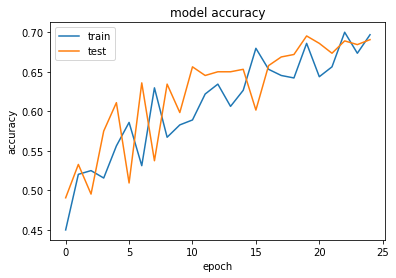

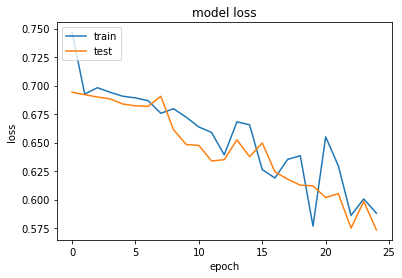

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Populating the interactive namespace from numpy and matplotlib


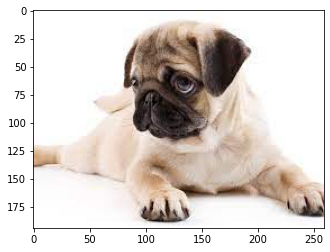

dog


In [14]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage import transform
import numpy as np
from keras.preprocessing import image

def load(filename):
 np_image = Image.open(filename)
 np_image = np.array(np_image).astype('float32')/255
 np_image = transform.resize(np_image, (64,64,3))
 np_image = np.expand_dims(np_image, axis=0)
 return np_image

image = 'img/download.jpg'
image_load = load(image)
result = cnn.predict(image_load) 
if result[0][0] > 0.5:
    prediction = 'cat'
else:
    prediction = 'dog'


img2 = mpimg.imread(image)
imgplot = plt.imshow(img2)
plt.show()

print(prediction)

In [21]:
import os
for filename in os.listdir(training_set):
    if filename.endswith(".jpg"):
        print(filename)
    else:
        continue